<a href="https://colab.research.google.com/github/delcorej/hello-world/blob/main/Titantic_test_train_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal of this notebook ##

I am going to use the famous Kaggle Titantic dataset that can be found here : https://www.kaggle.com/c/titanic/data?select=train.csv. The goal of this particular notebook is to practice my data vizualtion skills as well as to learn some machine learning skills.

In [39]:
pip install category_encoders

In [40]:
# time to import all of the necessary libraries for this notebook

# for the EDA part these are the basic libraries
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter('ignore') #to ignore any warnings that occur
%matplotlib inline


# for the machine learning part I am going to be utilizing sklearn
import lightgbm as lgb # this particular import is for tree based learning it is a gradient boosting framework
from sklearn.model_selection import train_test_split # this is because we need to first train the algorithm with data then test with new data to check for accuracy
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix #this utilized to test accuracy of the model
from sklearn.metrics import classification_report #this is for precision, recall, f1-score, and accuracy
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score #this measures the reliability of two raters that are rating the same quantity and shows when the raters are in agreement
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.metrics import roc_auc_score #curve plot
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import QuantileTransformer #non-paramitic data transformation technique used to transform data to follow a certain distrubution
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler #


In [41]:
#time to import the dataset for the EDA portion
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [42]:
df = pd.read_csv('train.csv')
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Summary of dataframe ##
So, this dataframe contains 12 column names. It also contains intergers, objects and floats as its data. There are a lot of unique values within the PassengerId, Name, and Ticket columns because of this I can rule out using those columns later in my machine learning algorithm because there are too many differences. But, the survived and gender sex column both have only two unique values. This could lead me to posing the question based upon the gender of a person they had n chance of surviving. 

## Visualization of Categorical Variables ##

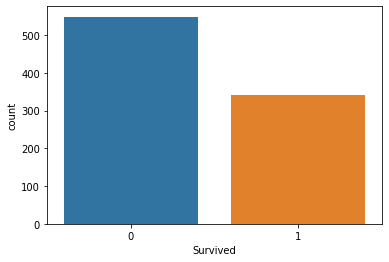

In [45]:
#visualization of the lucky survivors
sns.countplot(x='Survived',data=df)


This plot sadly illustrates that there were more fatalities on the titantic than survivors

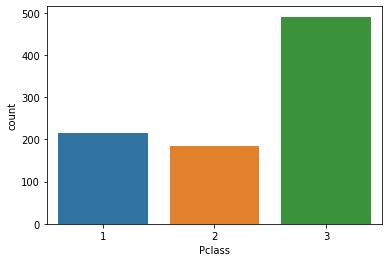

In [47]:
#visualization of the classes on board the ship
sns.countplot(x='Pclass',data=df)


This plot shows that out of all the classes there were more people in third class than anywhere else. 

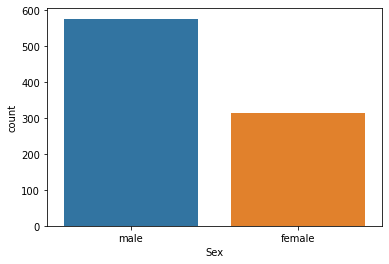

In [46]:
#visualization of males on the ship compared to females onboard
sns.countplot(x='Sex',data=df)

This one shows that there were way more males onboard the ship than females with the amount of males onboard being around double the amount of females

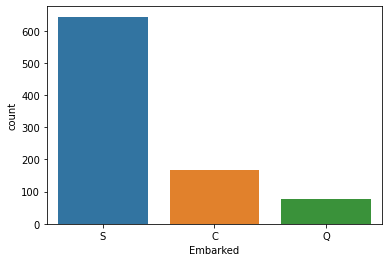

In [50]:
#visualization of what port the passengers embarked from
sns.countplot(x='Embarked', data=df)

The most popular port to embark from to get on the titantic was port S with most of the ships passengers coming from there

## Visualization of Quantitive Variables ##

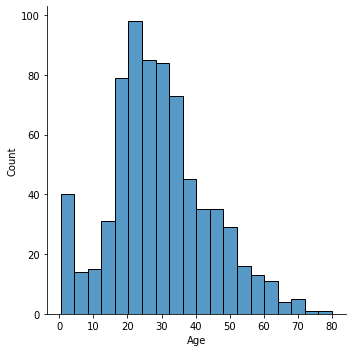

In [51]:
# lets look at the ages onboard the ship
sns.displot(df['Age'])

Looks like most of the people onboard the ship were in there 20s through late 30s. With there being a lot of younger than 10 years old on the ship as well we can infer that there were a lot of young families onboard perhaps on vacation

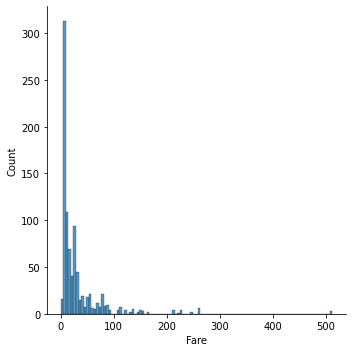

In [53]:
#lets look at the fares onboard the Titantic
sns.displot(df['Fare'])

If we keep in mind that an earlier visualization of this dataframe showed us that most passengers onboard were in third class it makes sense that there is a skew toward the left. Now there are some outliers for example the $500 fare.

## Visualizing with Multiple Variables ##

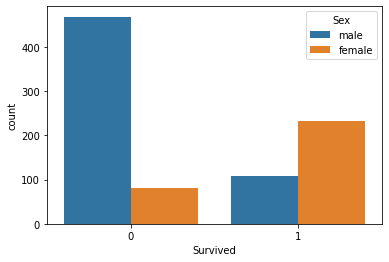

In [54]:
# the famous question shall be with gender was correlated with more survival
sns.countplot(x='Survived', hue='Sex', data =df)

Ladies first came in handy here as more of them survived

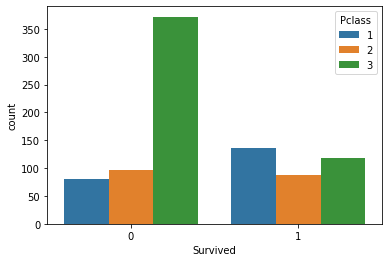

In [58]:
# Does the class a passenger  was in impact their rate of survival?
sns.countplot(x='Survived', hue='Pclass', data=df)

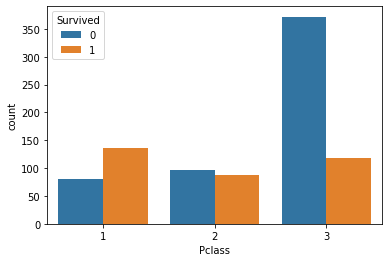

In [59]:
sns.countplot(x='Pclass', hue='Survived', data=df)

Class visualization illustrates that it did have an impact on survival. Sadly a lot of people in third class did lose their lives. But, is it that the class mattered or is because third class was more congested it was harder to get off the ship?

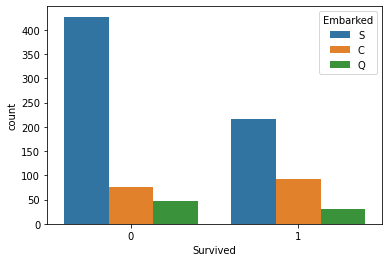

In [60]:
#lets look at where a person came from and whether not they survived
sns.countplot(x='Survived', hue='Embarked', data=df)

Now, this makes sense more people embarked from port S than anywhere else it makes sense that most of the deaths that occurred were from people who embarked from port S

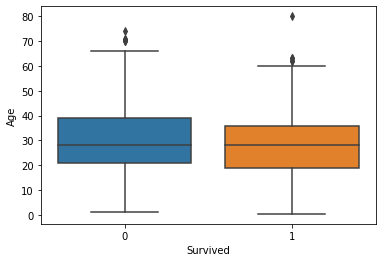

In [61]:
# did age of a passenger impact survival?
sns.boxplot(data=df, x='Survived', y='Age')

There is not a clear correlation between age and survival

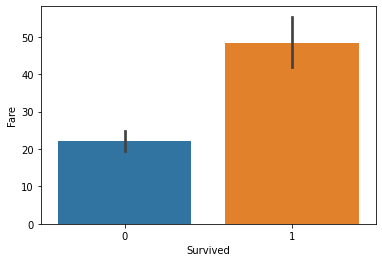

In [62]:
# Did buying a more expensive ticket mean you had a greater chance of survival?
sns.barplot(x='Survived', y='Fare', data=df)

Higher fares meant more likely survival but, makes sense too when you consider people in 2nd and 1st class had a greater chance of survival and the cost of those classes were higher fares

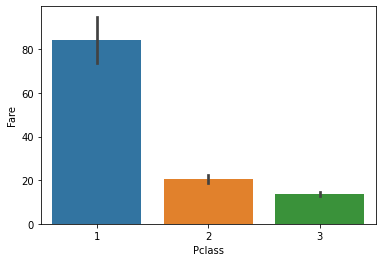

In [63]:
#lets test if that hypothesis is correct
sns.barplot(x='Pclass',y='Fare',data=df)

It is!

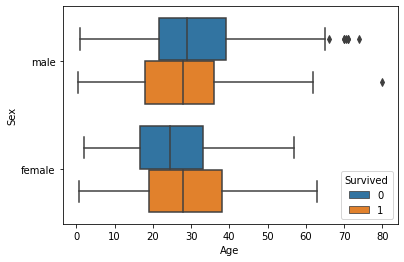

In [64]:
#now time to practice with multiple variables
#lets check to see if there are a specific age group within genders that had a greater chance of surviving
sns.boxplot(data=df, x='Age', y='Sex', hue='Survived')

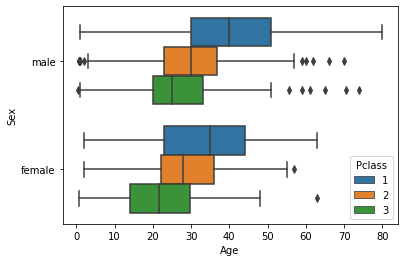

In [65]:
#Theres another way to do this boxplot
sns.boxplot(data=df, x='Age', y='Sex', hue='Pclass')

Older passengers survived more than younger which makes sense as typically older individuals have more money to spend on first and second class tickets

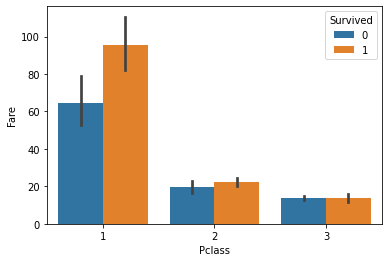

In [66]:
#lets look to see if there is a correlation between class, cost of fare and survival rate
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')

Higher class means higher fare and seems to indicate higher chance of survival

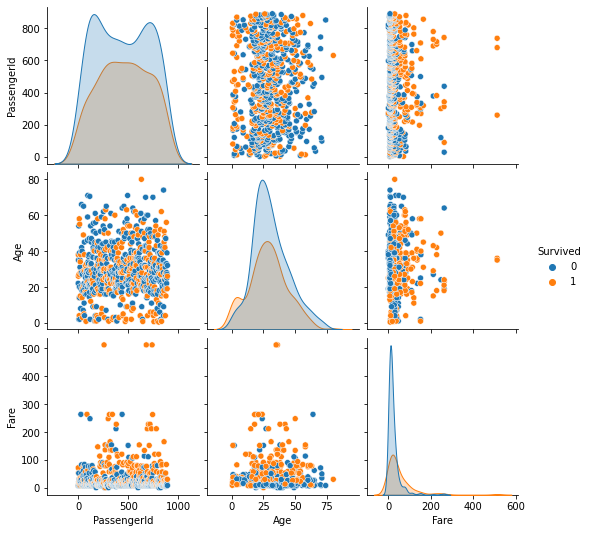

In [67]:
# a pair plot will help to see every numeric values correlation to survival
numeric = df.iloc[: , [0,1,5,9]]
sns.pairplot(numeric.dropna(), hue='Survived')

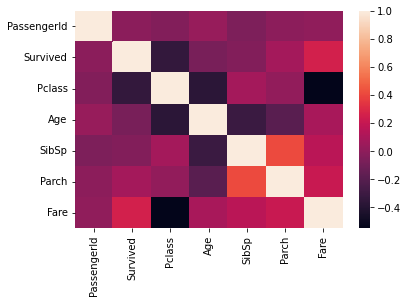

In [68]:
#now lets look at the correlation between all of the variables through the utilization of a heatmap
cor = df.corr()
sns.heatmap(cor)

I now have visualized every aspect I wanted to see of this data so now moving on to the challenging part

In [69]:
#time to import the test data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [70]:
#lets read this dataframe
df_test = pd.read_csv('test.csv')